In [2]:
##########Participants##########
#UPAMC US Treasury 20 YR Plus (00931B)
#Cathay US Treasury 20 YR Plus (00687B)
#Cathay US Corporate 10+ Years Banking (00933B)
#Capital ICE ESG 20+ BBB Corporate (00937B)
#US Ten Year Note Yield

In [5]:
#Package
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [6]:
# Read excel file
file_path = r'D:\Derivatives Trading\Bond ETF Database.xlsx'
df = pd.read_excel(file_path, index_col='Date', parse_dates=True)

In [7]:
# Separate yield column
yield_column = df.columns[-1]
yield_data = df[yield_column]
etf_data = df.drop(yield_column, axis=1)

In [8]:
# First Regression: US 10Y Yield (X) vs 00687B TW (Y)
print("\n=== Regression 1: US 10Y Yield vs 00687B TW ===")
X1 = df[yield_column]  # Independent variable (Yield)
X1 = sm.add_constant(X1)  # Add constant term
Y1 = df['00687B TW']  # Dependent variable (ETF price)

model1 = sm.OLS(Y1, X1).fit()
print("\nRegression Results for 00687B TW:")
print(model1.summary())


=== Regression 1: US 10Y Yield vs 00687B TW ===

Regression Results for 00687B TW:
                            OLS Regression Results                            
Dep. Variable:              00687B TW   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     576.3
Date:                Sat, 30 Nov 2024   Prob (F-statistic):           2.15e-65
Time:                        21:17:00   Log-Likelihood:                -161.83
No. Observations:                 239   AIC:                             327.7
Df Residuals:                     237   BIC:                             334.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [9]:
# Second Regression: US 10Y Yield (X) vs 00937B TW (Y)
print("\n=== Regression 2: US 10Y Yield vs 00937B TW ===")
X2 = df[yield_column]  # Independent variable (Yield)
X2 = sm.add_constant(X2)  # Add constant term
Y2 = df['00937B TW']  # Dependent variable (ETF price)

model2 = sm.OLS(Y2, X2).fit()
print("\nRegression Results for 00937B TW:")
print(model2.summary())


=== Regression 2: US 10Y Yield vs 00937B TW ===

Regression Results for 00937B TW:
                            OLS Regression Results                            
Dep. Variable:              00937B TW   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     232.6
Date:                Sat, 30 Nov 2024   Prob (F-statistic):           4.73e-37
Time:                        21:17:06   Log-Likelihood:                 44.406
No. Observations:                 239   AIC:                            -84.81
Df Residuals:                     237   BIC:                            -77.86
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [10]:
# Create regression summary DataFrame
regression_summary = pd.DataFrame({
    'ETF': ['00687B TW', '00937B TW'],
    'Beta (Yield Sensitivity)': [model1.params[1], model2.params[1]],
    'R-squared': [model1.rsquared, model2.rsquared],
    'P-value (Yield)': [model1.pvalues[1], model2.pvalues[1]],
    'Standard Error': [model1.bse[1], model2.bse[1]]
})

print("\nRegression Summary:")
print(regression_summary)

#Interpretation of the regression result
#If the US 10 YR yield increases by 1 basis point, then the price of 00687B decreases by 0.029 NT Dollars
#If the US 10 YR yield increases by 1 basis point, then the price of 00937B decreases by 0.078 NT Dollars


Regression Summary:
         ETF  Beta (Yield Sensitivity)  R-squared  P-value (Yield)  \
0  00687B TW                 -2.903301   0.708588     2.149463e-65   
1  00937B TW                 -0.778232   0.495292     4.733108e-37   

   Standard Error  
0        0.120941  
1        0.051030  


C:\Users\user\AppData\Local\Temp\ipykernel_13924\1272325975.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Beta (Yield Sensitivity)': [model1.params[1], model2.params[1]],
C:\Users\user\AppData\Local\Temp\ipykernel_13924\1272325975.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'P-value (Yield)': [model1.pvalues[1], model2.pvalues[1]],
C:\Users\user\AppData\Local\Temp\ipykernel_13924\1272325975.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by positio

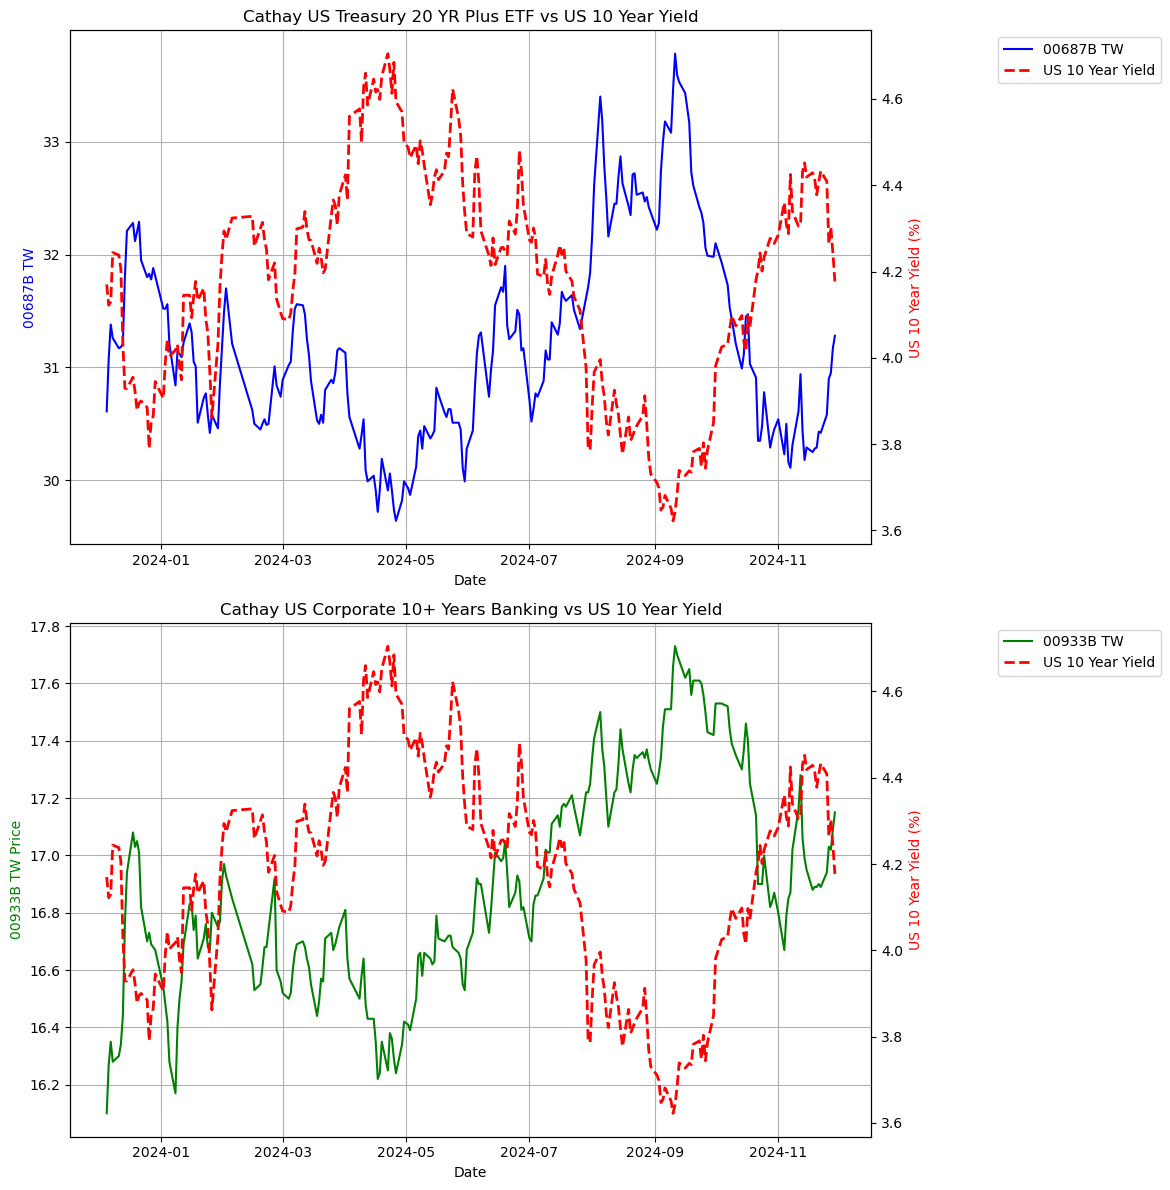

In [11]:
# Create a figure with two subplots
fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(12, 12))

# Add second y-axis for first subplot
ax2 = ax1.twinx()

# Plot 00687B TW on left axis of first subplot
ax1.plot(df.index, df['00687B TW'], label='00687B TW', color='blue')

# Plot US 10Y yield on right axis of first subplot
ax2.plot(df.index, df[yield_column], label=yield_column, color='red', linestyle='--', linewidth=2)

# Set labels and title for first subplot
ax1.set_xlabel('Date')
ax1.set_ylabel('00687B TW', color='blue')
ax2.set_ylabel('US 10 Year Yield (%)', color='red')

# Add legends for first subplot
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, bbox_to_anchor=(1.15, 1), loc='upper left')

ax1.set_title('Cathay US Treasury 20 YR Plus ETF vs US 10 Year Yield')
ax1.grid(True)

# Add second y-axis for second subplot
ax4 = ax3.twinx()

# Plot 00933B TW on left axis of second subplot
ax3.plot(df.index, df['00933B TW'], label='00933B TW', color='green')

# Plot US 10Y yield on right axis of second subplot
ax4.plot(df.index, df[yield_column], label=yield_column, color='red', linestyle='--', linewidth=2)

# Set labels and title for second subplot
ax3.set_xlabel('Date')
ax3.set_ylabel('00933B TW Price', color='green')
ax4.set_ylabel('US 10 Year Yield (%)', color='red')

# Add legends for second subplot
lines3, labels3 = ax3.get_legend_handles_labels()
lines4, labels4 = ax4.get_legend_handles_labels()
ax3.legend(lines3 + lines4, labels3 + labels4, bbox_to_anchor=(1.15, 1), loc='upper left')

ax3.set_title('Cathay US Corporate 10+ Years Banking vs US 10 Year Yield')
ax3.grid(True)

plt.tight_layout()
plt.show()